# Name:  Ashwini Devkota
# News Mood

## Analysis

    This program utilizes a Python Script to perform a sentiment analysis of the Twitter 
    activity of various news organizations: BBC, CBS, CNN, Fox and New York Times.  Then 
    it presents those findings visually using a scatterplot and a bar graph.  
    
    Here are the three observable trends based on data:
    
    (1) All five news organizations have overall negative polarity scores.
    
    (2) BBC had the highest negative polarity scores followed by CBS.  On the other hand, 
        New York Times had the overall least negative polarity scores.
    
    (3) The polarity scores of total tweets analyzed for all news organizations were  
        distributed fairly equally among positive, neutral and negative polarity scores  
        (slightly skewed towards negative)

In [2]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
from config import consumer_key, consumer_secret, \
    access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target news sources
target_users = ("BBCWorld", "CBSNews", "CNN", "FOXNews", "nytimes")

# Variables for holding sentiments
sentiments = []

In [6]:
# Loop through all news sources
for user in target_users:
    
    # Counter variable
    counter = 1
    
    # Get all tweets from home feed (total = 100 tweets)
    public_tweets = api.user_timeline(user, count = 100)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweets
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweets into an array
        sentiments.append({"Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": counter,
                           "User": user,
                           "Date": tweet["created_at"],
                           "Tweet Text": tweet["text"]})
    
        # Add to counter
        counter = counter + 1
        
# sentiments     

In [7]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)

sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Wed Mar 07 09:01:50 +0000 2018,0.000,1.000,0.00,Coca-Cola plans Japan foray into alcohol https...,1,BBCWorld
1,0.0000,Wed Mar 07 08:26:06 +0000 2018,0.000,1.000,0.00,RT @SallyBundockBBC: #Mattel is marking #Inter...,2,BBCWorld
2,-0.4019,Wed Mar 07 08:17:45 +0000 2018,0.252,0.748,0.00,Terminal illness led to Australia's first same...,3,BBCWorld
3,-0.3818,Wed Mar 07 08:17:43 +0000 2018,0.245,0.755,0.00,Blackberry sues Facebook in fight over app pat...,4,BBCWorld
4,0.1531,Wed Mar 07 08:12:47 +0000 2018,0.268,0.352,0.38,Fyre Festival co-founder Billy McFarland admit...,5,BBCWorld


In [8]:
# Export dataframe to a csv
sentiments_df.to_csv("csv_data.csv")

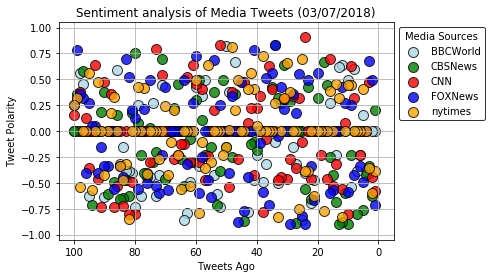

In [9]:
date = time.strftime("%m/%d/%Y")

colors = ["lightblue", "green", "red", "blue", "orange"]

# counter
i = 0

# Loop through all target users and plot scatterplot
for user in target_users:
    new_df = sentiments_df.loc[sentiments_df["User"] == user]   
    plt.scatter(new_df["Tweets Ago"], new_df["Compound"], label = user, 
                s = 100, color = colors[i], edgecolors = "black", alpha = 0.8)
    i = i + 1

# x-limit, y-limit, Grid and Legends for scatterplot
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)
plt.grid()
plt.legend(bbox_to_anchor = (1,1), title = "Media Sources", edgecolor = "black")

# Chart Title, x-label and y-label
plt.title("Sentiment analysis of Media Tweets (%s)" % date)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Export and save Bar plot
plt.savefig("Scatterplot_SentimentAnalysis.png", bbox_inches = "tight")

# Print chart to the screen
plt.show()

In [10]:
ave_sentiment_by_source = sentiments_df.groupby("User")["Compound"].mean()
ave_sentiment_by_source

User
BBCWorld   -0.103437
CBSNews    -0.094567
CNN        -0.031231
FOXNews    -0.039542
nytimes    -0.009563
Name: Compound, dtype: float64

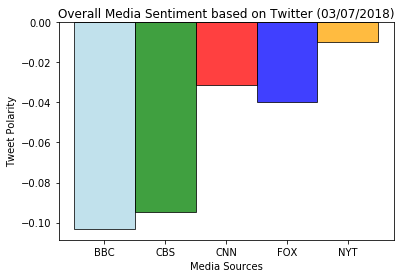

In [11]:
# Define x-axis and xlabels
x_axis = np.arange(len(ave_sentiment_by_source))
x_labels = ave_sentiment_by_source.index

# Plot bar graph and assign appropriate parameters
plt.bar(x_axis, ave_sentiment_by_source, width = 1, tick_label = x_labels,
        color = colors, alpha = 0.75, align = "edge", edgecolor = "black")
tick_locations = [i+0.5 for i in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])

# Chart Title, x-label and y-label
plt.title("Overall Media Sentiment based on Twitter (%s)" % date)
plt.xlabel("Media Sources")
plt.ylabel("Tweet Polarity")

# Export and save Bar plot
plt.savefig("Barplot_OverallSentiment.png")

# Print chart to the screen
plt.show()